In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
from scipy import stats
from viewser.operations import fetch
from viewser import Queryset, Column
import subprocess
from scipy.stats import chi2

In [2]:
from MonthToAnnual import MonthToAnnualRegression

In [3]:
df = Queryset("month_to_annual_moving_sum", "country_month").fetch()

 .    

In [4]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709  0.000000e+00   
         2                    21.704949        12.834983  0.000000e+00   
         3                    22.994549        13.935826  0.000000e+00   
         4                     0.000000        16.537493  0.000000e+00   
         5                    19.784920        12.013131  0.000000e+00   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941  0.000000e+00   
         243                  25.542467        17.428496  0.000000e+00   
         244                  22.728763        15.344817  0.000000e+00   
         245                  25.101865        17.636672  8.881784e-16   
         246                  23.207989        16.190256  0.000000e+00   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         2           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         3           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         4           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         5           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                           ...           ...           ...           ...   
852      242         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         243         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         244         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         245         8.881784e-16  8.881784e-16  8.881784e-16  8.881784e-16   
         246         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                     ...  ged_sb_tlag27  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id  ...                                                
1        1           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         2           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         3           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         4           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         5           ...   0.000000e+00   0.000000e+00   0.000000e+00   
...                  ...            ...            ...            ...   
852      242         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         243         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         244         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         245         ...   8.881784e-16   8.881784e-16   8.881784e-16   
         246         ...   0.000000e+00   0.000000e+00   0.000000e+00   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
mont

In [5]:
df = df.query('country_id != [239,240]')

In [6]:
df.query('country_id == 28')

,,country_name,ged_sb_nolag,wdi_sh_dyn_mort_fe,wdi_ny_gdp_mktp_kd,wdi_sp_pop_totl,ged_sb_tlag1,ged_sb_tlag2,ged_sb_tlag3,ged_sb_tlag4,ged_sb_tlag5,...,ged_sb_tlag27,ged_sb_tlag28,ged_sb_tlag29,ged_sb_tlag30,ged_sb_tlag31,ged_sb_tlag32,ged_sb_tlag33,ged_sb_tlag34,ged_sb_tlag35,ged_sb_tlag36
month_id,country_id,,,,,,,,,,,,,,,,,,,,,
1,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,28,Colombia,0.0,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
849,28,Colombia,0.0,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850,28,Colombia,0.0,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
fixed_effect_column = 'country_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)
fixed_effect_column = 'month_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)

/var/folders/qx/vpttxp096k9bhf2r8qcpdxlm0000gn/T/ipykernel_45622/1383390420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)
/var/folders/qx/vpttxp096k9bhf2r8qcpdxlm0000gn/T/ipykernel_45622/1383390420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)


In [8]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709  0.000000e+00   
         2                    21.704949        12.834983  0.000000e+00   
         3                    22.994549        13.935826  0.000000e+00   
         4                     0.000000        16.537493  0.000000e+00   
         5                    19.784920        12.013131  0.000000e+00   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941  0.000000e+00   
         243                  25.542467        17.428496  0.000000e+00   
         244                  22.728763        15.344817  0.000000e+00   
         245                  25.101865        17.636672  8.881784e-16   
         246                  23.207989        16.190256  0.000000e+00   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         2           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         3           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         4           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         5           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                           ...           ...           ...           ...   
852      242         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         243         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         244         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         245         8.881784e-16  8.881784e-16  8.881784e-16  8.881784e-16   
         246         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
1        1           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         2           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         3           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         4           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         5           ...   0.000000e+00   0.000000e+00   0.000000e+00   
...                  ...            ...            ...            ...   
852      242         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         243         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         244         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         245         ...   8.881784e-16   8.881784e-16   8.881784e-16   
         246         ...   0.000000e+00   0.000000e+00   0.000000e+00   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [9]:
# Remove countries that don't exist anymore
df = df.query('country_id!=185') # German Democratic Republic
# Remove country months that have value zero for dependent variable
df = df.query('wdi_sh_dyn_mort_fe!=0') 


In [10]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709  0.000000e+00   
         2                    21.704949        12.834983  0.000000e+00   
         3                    22.994549        13.935826  0.000000e+00   
         4                     0.000000        16.537493  0.000000e+00   
         5                    19.784920        12.013131  0.000000e+00   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941  0.000000e+00   
         243                  25.542467        17.428496  0.000000e+00   
         244                  22.728763        15.344817  0.000000e+00   
         245                  25.101865        17.636672  8.881784e-16   
         246                  23.207989        16.190256  0.000000e+00   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         2           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         3           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         4           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         5           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                           ...           ...           ...           ...   
852      242         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         243         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         244         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
         245         8.881784e-16  8.881784e-16  8.881784e-16  8.881784e-16   
         246         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
1        1           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         2           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         3           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         4           ...   0.000000e+00   0.000000e+00   0.000000e+00   
         5           ...   0.000000e+00   0.000000e+00   0.000000e+00   
...                  ...            ...            ...            ...   
852      242         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         243         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         244         ...   0.000000e+00   0.000000e+00   0.000000e+00   
         245         ...   8.881784e-16   8.881784e-16   8.881784e-16   
         246         ...   0.000000e+00   0.000000e+00   0.000000e+00   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [11]:
df = df.query('month_id > 240 & month_id < 450')

In [12]:
data_without_shocks = MonthToAnnualRegression(df)

In [13]:
data_without_shocks.data

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
241      1                        Guyana      0.000000            3.732896   
         2                      Suriname      0.000000            3.349904   
         3           Trinidad and Tobago      0.000000            3.277145   
         4                     Venezuela      0.000000            2.990720   
         5                         Samoa      0.000000            3.005683   
...                                  ...           ...                 ...   
449      242                    Tanzania      0.000000            3.929863   
         243                     Morocco      0.000000            3.005683   
         244                  Mauritania      0.000000            3.747148   
         245                       Sudan      4.143135            4.053523   
         246                 South Sudan      1.609438            4.554929   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826      0.000000   
         2                    21.795169        13.079454      0.000000   
         3                    23.309243        14.102345      0.000000   
         4                     0.000000        17.011230      0.000000   
         5                    20.098032        12.122740      0.000000   
...                                 ...              ...           ...   
449      242                  24.713506        17.845619      0.000000   
         243                  25.482046        17.385835      0.000000   
         244                  22.615803        15.241029      0.000000   
         245                  25.206898        17.521243     28.105694   
         246                  23.207989        16.181843     39.834858   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1               0.000000      0.000000      0.000000      0.000000   
         2               0.000000      0.000000      0.000000      0.000000   
         3               0.000000      0.000000      0.000000      0.000000   
         4               0.000000      0.000000      0.000000      0.000000   
         5               0.000000      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
449      242             0.000000      0.000000      0.000000      0.000000   
         243             0.000000      0.000000      0.000000      0.000000   
         244             0.000000      0.000000      0.000000      0.000000   
         245            30.055260     35.317950     39.292948     42.345376   
         246            36.810955     35.712343     34.326048     31.067952   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
241      1           ...       0.000000       0.000000       0.000000   
         2           ...       0.000000       0.000000       0.000000   
         3           ...       0.000000       0.000000       0.000000   
         4           ...       0.000000       0.000000       0.000000   
         5           ...       0.000000       0.000000       0.000000   
...                  ...            ...            ...            ...   
449      242         ...       0.000000       0.000000       0.000000   
         243         ...       0.000000       0.000000       0.000000   
         244         ...       0.000000       0.000000       0.000000   
         245         ...      41.382015      40.441032      40.762616   
         246         ...      45.191726      51.938138      48.300552   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [14]:
independent_variable_without_shocks = ['wdi_ny_gdp_mktp_kd','wdi_sp_pop_totl','country_id','month_id']
dependent_variable = 'wdi_sh_dyn_mort_fe'
data_without_shocks.ols_regression(independent_variable_without_shocks,dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27', 'country_28', 'country_29', 'country_30', 'country_31', 'country_32', 'country_33', 'country_34', 'country_35', 'country_36', 'country_37', 'country_38', 'country_39', 'country_40', 'country_41', 'country_42', 'country_43', 'country_45', 'country_46', 'country_47', 'country_48', 'country_49', 'country_50', 'country_52', 'country_53', 'country_54', 'country_55', 'country_56', 'country_57', 'country_58', 'country_59', 'country_60', 'country_62', 'country_63', 'country_64', 'country_65', 'country_66', 'country_67', 'country_69', 'country_70', 'country_73', 'country_74', 'country_76', 'c

In [15]:
data_without_shocks.prediction(independent_variable_without_shocks, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27', 'country_28', 'country_29', 'country_30', 'country_31', 'country_32', 'country_33', 'country_34', 'country_35', 'country_36', 'country_37', 'country_38', 'country_39', 'country_40', 'country_41', 'country_42', 'country_43', 'country_45', 'country_46', 'country_47', 'country_48', 'country_49', 'country_50', 'country_52', 'country_53', 'country_54', 'country_55', 'country_56', 'country_57', 'country_58', 'country_59', 'country_60', 'country_62', 'country_63', 'country_64', 'country_65', 'country_66', 'country_67', 'country_69', 'country_70', 'country_73', 'country_74', 'country_76', 'c

In [16]:
data_without_shocks.predictions

{'Fixed Effect': month_id  country_id
 241       1             3.824751
           2             3.444025
           3             3.490317
           4             3.051338
           5             3.240279
                           ...   
 449       242           3.984927
           243           3.125409
           244           3.796523
           245           4.090926
           246           4.547968
 Length: 39173, dtype: float64}

In [17]:
data_without_shocks.results

{'Fixed Effect': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.991
 Model:                            OLS   Adj. R-squared:                  0.990
 Method:                 Least Squares   F-statistic:                     1705.
 Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
 Time:                        10:50:41   Log-Likelihood:                 2781.4
 No. Observations:                3188   AIC:                            -5173.
 Df Residuals:                    2993   BIC:                            -3990.
 Df Model:                         194                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------

In [18]:
data_with_shocks = MonthToAnnualRegression(df)

In [19]:
independent_variable_with_shocks = ['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17',
                        'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id']
dependent_variable = 'wdi_sh_dyn_mort_fe'
data_with_shocks.ols_regression(independent_variable_with_shocks, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

In [20]:
data_with_shocks.results

{'Fixed Effect': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.991
 Model:                            OLS   Adj. R-squared:                  0.991
 Method:                 Least Squares   F-statistic:                     1476.
 Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
 Time:                        10:50:42   Log-Likelihood:                 2849.6
 No. Observations:                3188   AIC:                            -5235.
 Df Residuals:                    2956   BIC:                            -3828.
 Df Model:                         231                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------

In [21]:
data_with_shocks.prediction(independent_variable_with_shocks, dependent_variable, 'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

___

**<center>Likelihood Ratio Test</center>**

___

In [22]:
MonthToAnnualRegression.likelihood_ratio_test(data_with_shocks.models['Fixed Effect'], data_without_shocks.models['Fixed Effect'],36,0.02)

Likelihood Ratio Test Statistic: 136.4021610305117
P-value: 2.644084252006417e-13
Critical value: 55.48885986349095
Test Statistic > Critical Value: Reject the null hypothesis


- A likelihood ratio test statistic of 136.40 and a p-value of approximately 2.64e-13 suggest strong evidence against the null hypothesis. In statistics, a very small p-value (typically below a significance level like 0.05) indicates that you would reject the null hypothesis in favor of the alternative hypothesis.
- In the context of the likelihood ratio test, where you're comparing nested models (one being a more complex model than the other), these results suggest that <u>the more complex model (the one with additional variables or complexity) significantly improves the fit</u> compared to the simpler model. This improvement is substantial enough to conclude that the additional variables or complexity in the more complex model contribute significantly to explaining the variability in the data.

___

___
**<center>Prediction Plots for No Shocks</center>**

___

In [23]:
df = Queryset("month_to_annual_moving_sum", "country_month").fetch()
df = df.query('month_id > 240 & month_id < 511')
df = df.query('country_id != [239,240]')
# Remove countries that don't exist anymore
df = df.query('country_id!=185')  # German Democratic Republic
# Remove country months that have value zero for dependent variable
df = df.query('wdi_sh_dyn_mort_fe!=0')
fixed_effect_column = 'country_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)
fixed_effect_column = 'month_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)

 .    

In [24]:
out_of_sample = MonthToAnnualRegression(df)

In [25]:
out_of_sample.models = data_without_shocks.models

In [26]:
out_of_sample.prediction(independent_variable_without_shocks, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27', 'country_28', 'country_29', 'country_30', 'country_31', 'country_32', 'country_33', 'country_34', 'country_35', 'country_36', 'country_37', 'country_38', 'country_39', 'country_40', 'country_41', 'country_42', 'country_43', 'country_45', 'country_46', 'country_47', 'country_48', 'country_49', 'country_50', 'country_52', 'country_53', 'country_54', 'country_55', 'country_56', 'country_57', 'country_58', 'country_59', 'country_60', 'country_62', 'country_63', 'country_64', 'country_65', 'country_66', 'country_67', 'country_69', 'country_70', 'country_73', 'country_74', 'country_76', 'c

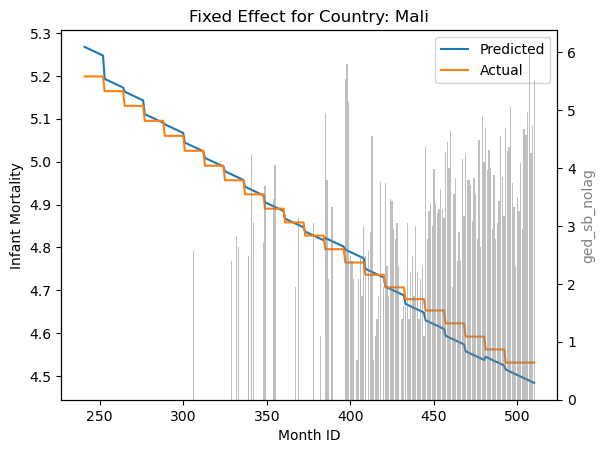

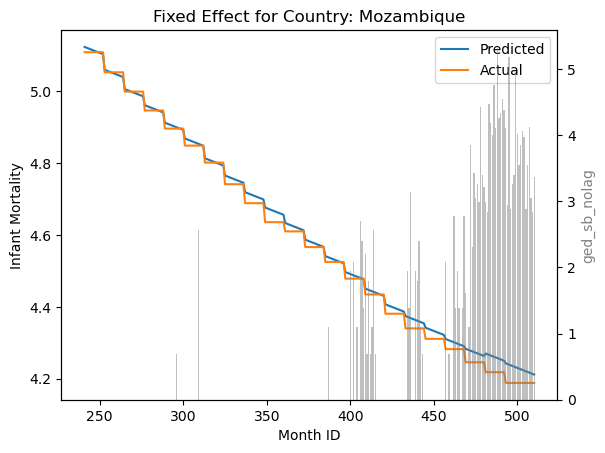

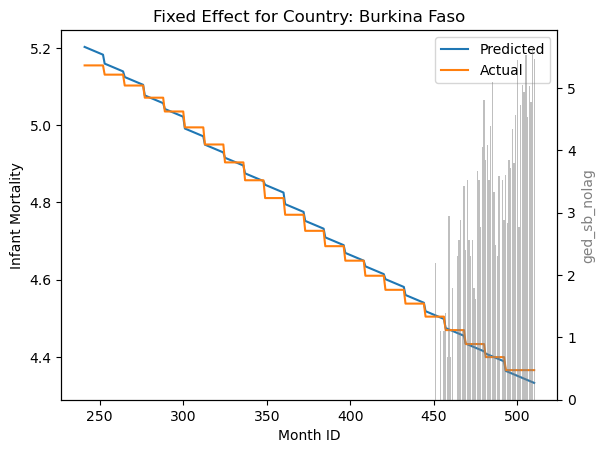

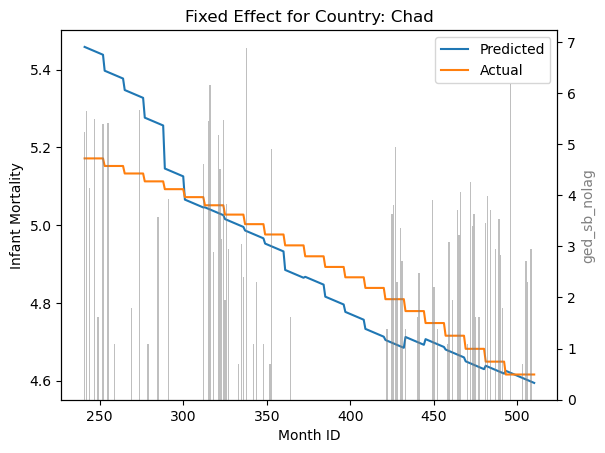

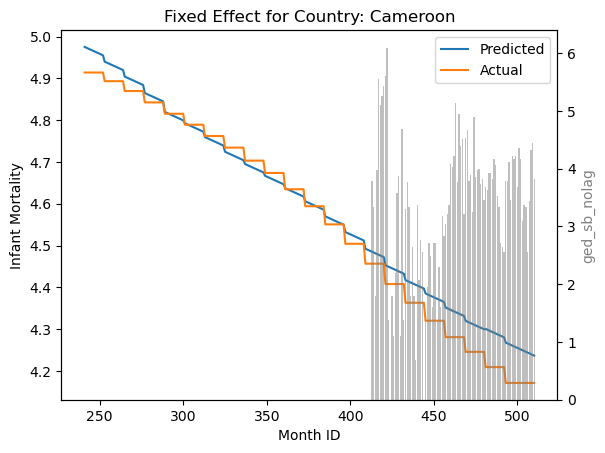

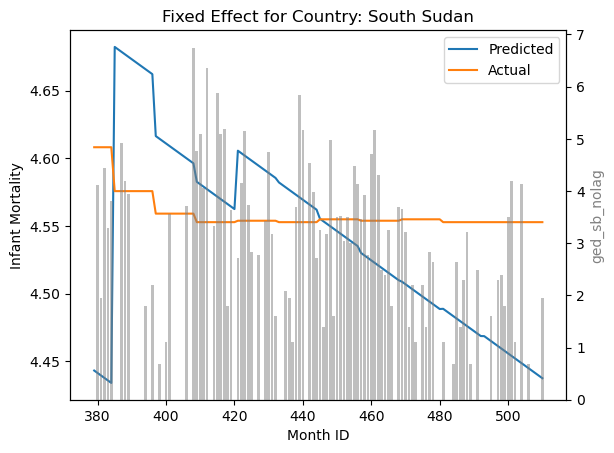

In [27]:
for country_id in [50, 162, 47, 214, 69, 246]:
    out_of_sample.plot_time_series_regression(
        independent_variable_without_shocks, dependent_variable, 'Fixed Effect', country_id, 'ged_sb_nolag')

___
**<center>Prediction Plots for Shocks</center>**

___

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

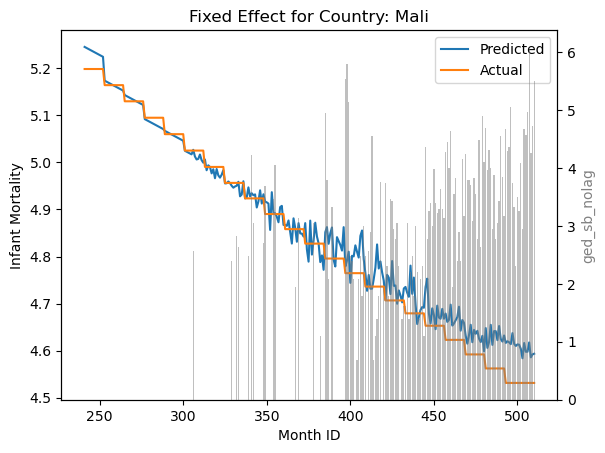

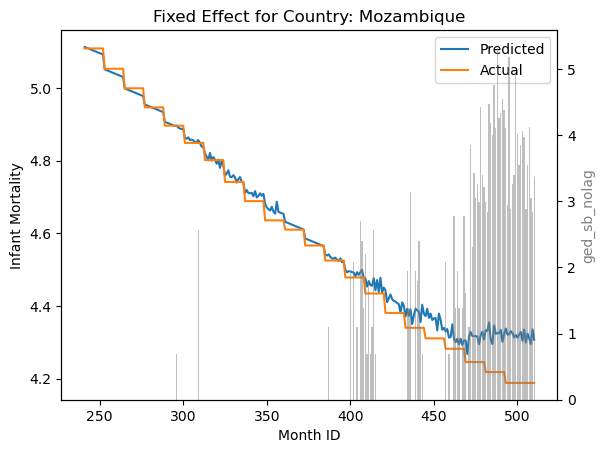

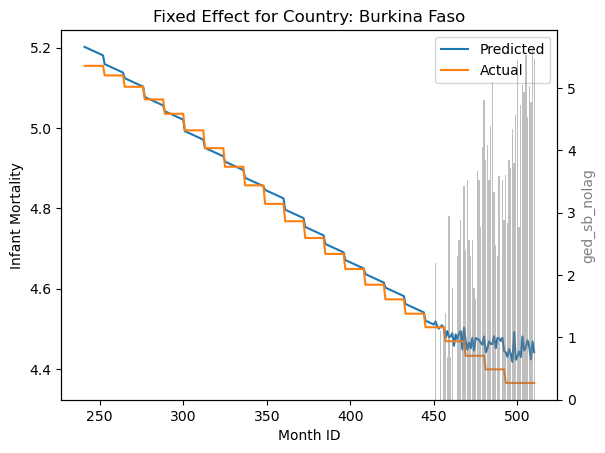

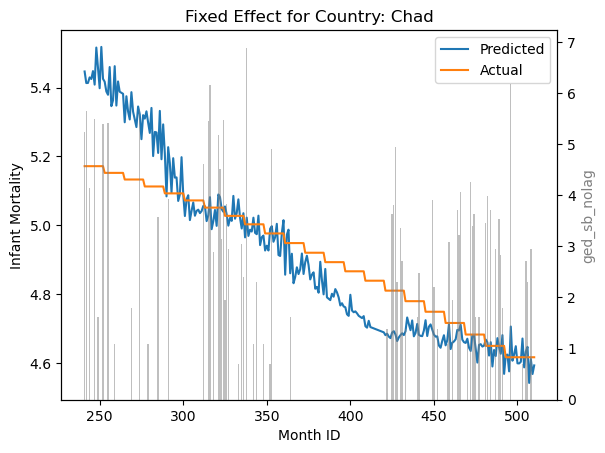

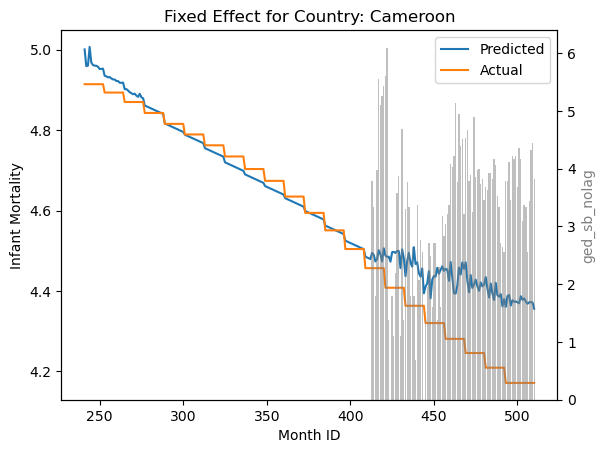

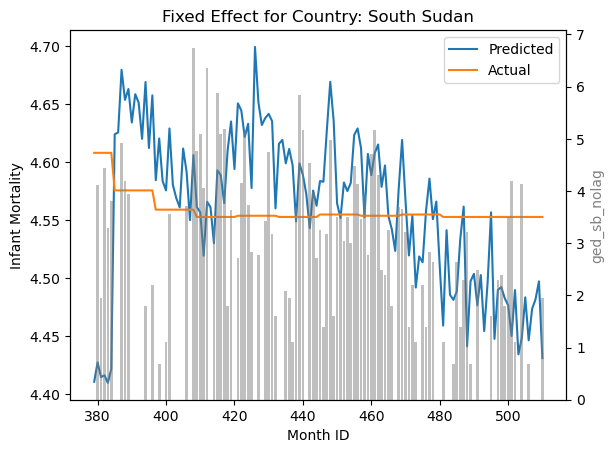

In [28]:
out_of_sample.models = data_with_shocks.models
out_of_sample.prediction(independent_variable_with_shocks, dependent_variable, 'Fixed Effect')
for country_id in [50, 162, 47, 214, 69, 246]:
    out_of_sample.plot_time_series_regression(
        independent_variable_with_shocks, dependent_variable, 'Fixed Effect', country_id, 'ged_sb_nolag')

country_id: --->  1


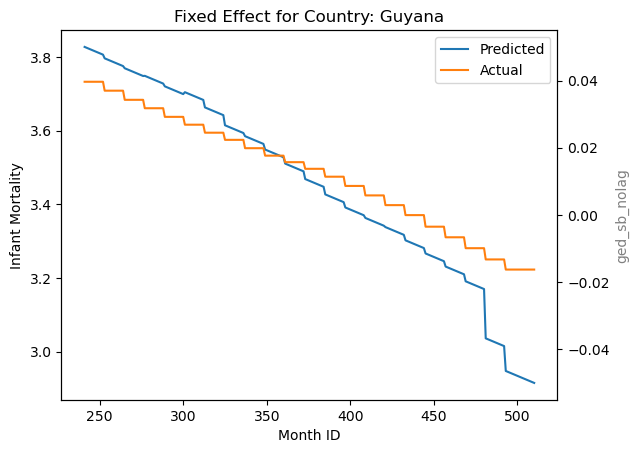

In [29]:
country_id = 1
while country_id<2:
    try: 
        print('country_id: ---> ',country_id)    
        out_of_sample.plot_time_series_regression(independent_variable_with_shocks, dependent_variable, 'Fixed Effect', country_id, 'ged_sb_nolag')
    except Exception as e:
        print(f"Error processing country ID {country_id}: {e}")
    country_id = country_id+1

___
<center>Contrafactuals</center>

___

In [30]:
df = df.query('month_id > 240 & month_id < 450')

In [31]:
contrafactuals = MonthToAnnualRegression(df)

In [32]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
241      1                        Guyana      0.000000            3.732896   
         2                      Suriname      0.000000            3.349904   
         3           Trinidad and Tobago      0.000000            3.277145   
         4                     Venezuela      0.000000            2.990720   
         5                         Samoa      0.000000            3.005683   
...                                  ...           ...                 ...   
449      242                    Tanzania      0.000000            3.929863   
         243                     Morocco      0.000000            3.005683   
         244                  Mauritania      0.000000            3.747148   
         245                       Sudan      4.143135            4.053523   
         246                 South Sudan      1.609438            4.554929   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826      0.000000   
         2                    21.795169        13.079454      0.000000   
         3                    23.309243        14.102345      0.000000   
         4                     0.000000        17.011230      0.000000   
         5                    20.098032        12.122740      0.000000   
...                                 ...              ...           ...   
449      242                  24.713506        17.845619      0.000000   
         243                  25.482046        17.385835      0.000000   
         244                  22.615803        15.241029      0.000000   
         245                  25.206898        17.521243     28.105694   
         246                  23.207989        16.181843     39.834858   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1               0.000000      0.000000      0.000000      0.000000   
         2               0.000000      0.000000      0.000000      0.000000   
         3               0.000000      0.000000      0.000000      0.000000   
         4               0.000000      0.000000      0.000000      0.000000   
         5               0.000000      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
449      242             0.000000      0.000000      0.000000      0.000000   
         243             0.000000      0.000000      0.000000      0.000000   
         244             0.000000      0.000000      0.000000      0.000000   
         245            30.055260     35.317950     39.292948     42.345376   
         246            36.810955     35.712343     34.326048     31.067952   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
241      1           ...       0.000000       0.000000       0.000000   
         2           ...       0.000000       0.000000       0.000000   
         3           ...       0.000000       0.000000       0.000000   
         4           ...       0.000000       0.000000       0.000000   
         5           ...       0.000000       0.000000       0.000000   
...                  ...            ...            ...            ...   
449      242         ...       0.000000       0.000000       0.000000   
         243         ...       0.000000       0.000000       0.000000   
         244         ...       0.000000       0.000000       0.000000   
         245         ...      41.382015      40.441032      40.762616   
         246         ...      45.191726      51.938138      48.300552   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [33]:
contrafactuals.data['ged_sb_nolag'] = 0
for k in range(1,37):
    contrafactuals.data[f'ged_sb_tlag{k}'] = 0

/var/folders/qx/vpttxp096k9bhf2r8qcpdxlm0000gn/T/ipykernel_45622/2147621455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contrafactuals.data['ged_sb_nolag'] = 0
/var/folders/qx/vpttxp096k9bhf2r8qcpdxlm0000gn/T/ipykernel_45622/2147621455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contrafactuals.data[f'ged_sb_tlag{k}'] = 0


In [34]:
contrafactuals.data

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
241      1                        Guyana             0            3.732896   
         2                      Suriname             0            3.349904   
         3           Trinidad and Tobago             0            3.277145   
         4                     Venezuela             0            2.990720   
         5                         Samoa             0            3.005683   
...                                  ...           ...                 ...   
449      242                    Tanzania             0            3.929863   
         243                     Morocco             0            3.005683   
         244                  Mauritania             0            3.747148   
         245                       Sudan             0            4.053523   
         246                 South Sudan             0            4.554929   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826             0   
         2                    21.795169        13.079454             0   
         3                    23.309243        14.102345             0   
         4                     0.000000        17.011230             0   
         5                    20.098032        12.122740             0   
...                                 ...              ...           ...   
449      242                  24.713506        17.845619             0   
         243                  25.482046        17.385835             0   
         244                  22.615803        15.241029             0   
         245                  25.206898        17.521243             0   
         246                  23.207989        16.181843             0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1                      0             0             0             0   
         2                      0             0             0             0   
         3                      0             0             0             0   
         4                      0             0             0             0   
         5                      0             0             0             0   
...                           ...           ...           ...           ...   
449      242                    0             0             0             0   
         243                    0             0             0             0   
         244                    0             0             0             0   
         245                    0             0             0             0   
         246                    0             0             0             0   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
241      1           ...              0              0              0   
         2           ...              0              0              0   
         3           ...              0              0              0   
         4           ...              0              0              0   
         5           ...              0              0              0   
...                  ...            ...            ...            ...   
449      242         ...              0              0              0   
         243         ...              0              0              0   
         244         ...              0              0              0   
         245         ...              0              0              0   
         246         ...              0              0              0   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [35]:
contrafactuals.models = data_with_shocks.models

In [36]:
contrafactuals.prediction(independent_variable_with_shocks,dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

country_id: --->  1


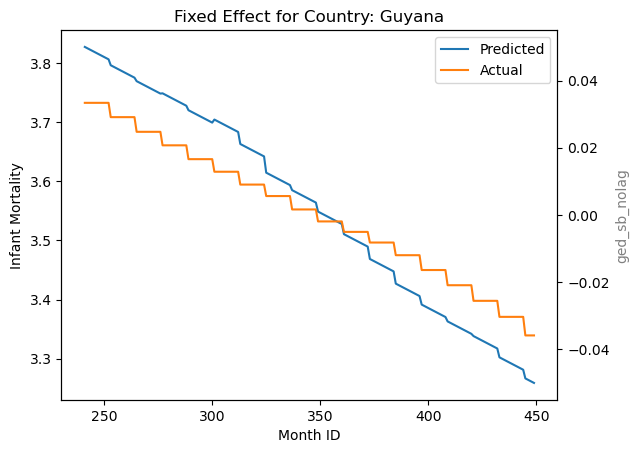

country_id: --->  2


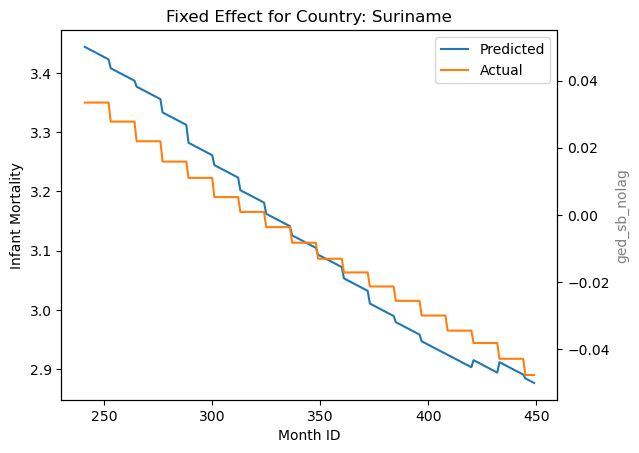

country_id: --->  3


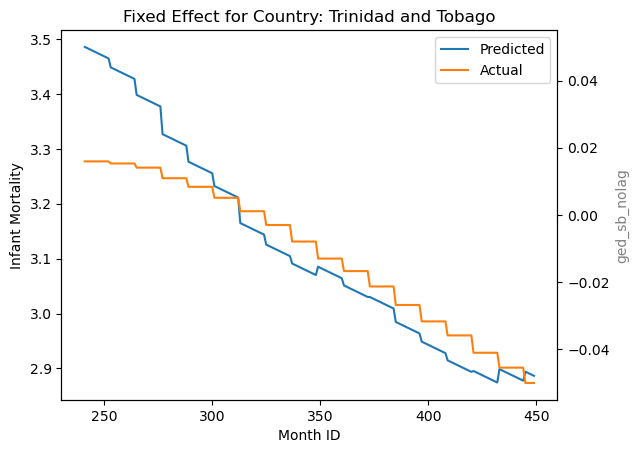

country_id: --->  4


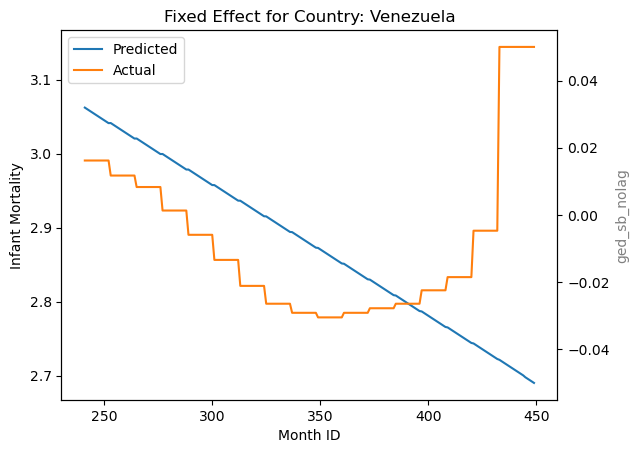

country_id: --->  5


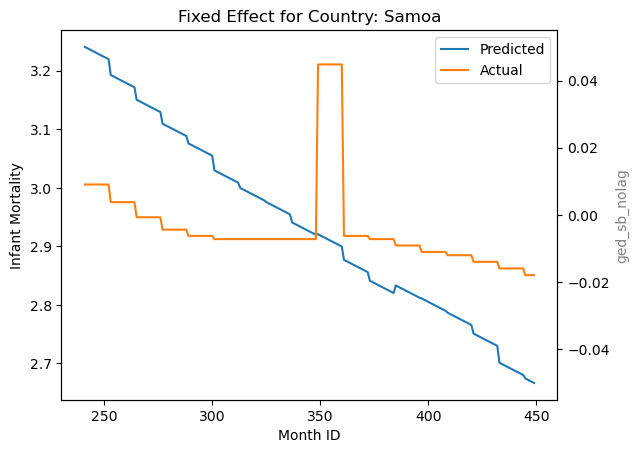

country_id: --->  6


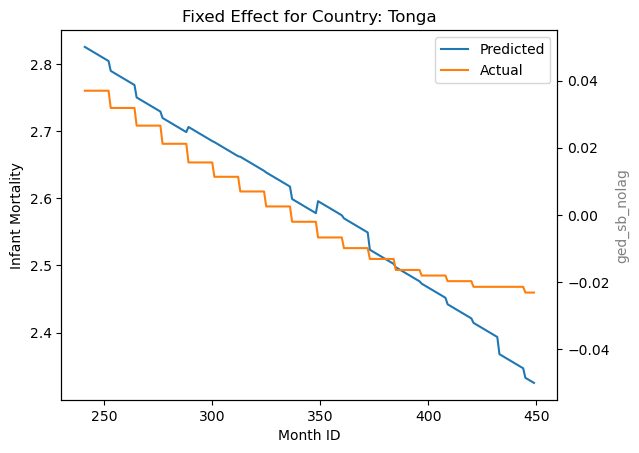

country_id: --->  7


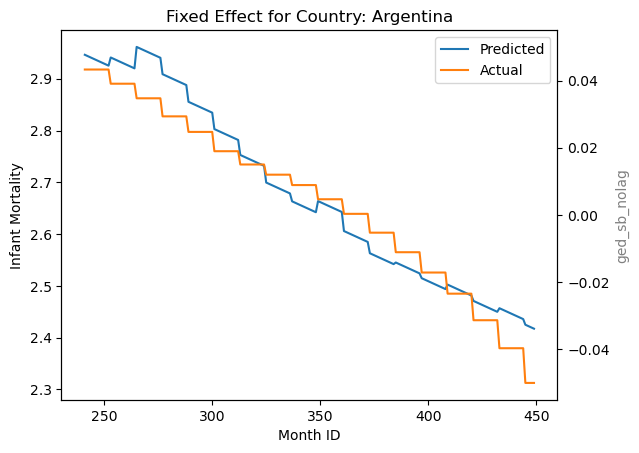

country_id: --->  8


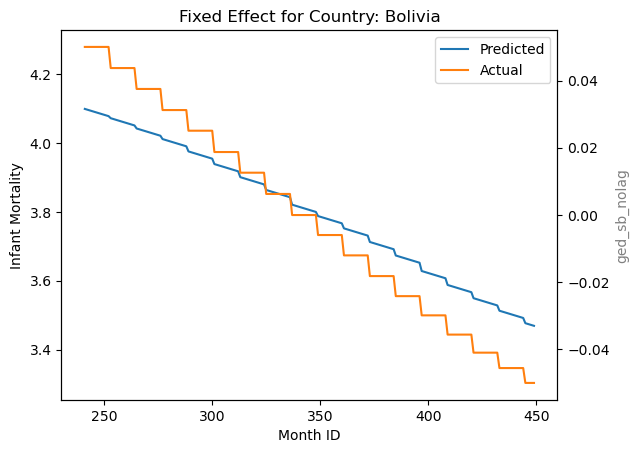

country_id: --->  9


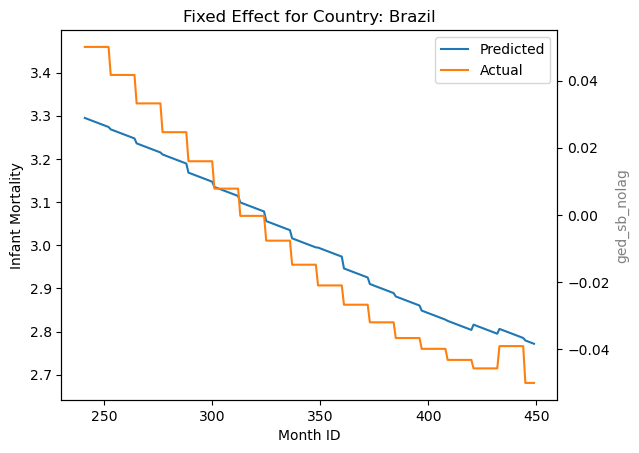

In [37]:
country_id = 1
while country_id < 10:
    try:
        print('country_id: ---> ', country_id)
        contrafactuals.plot_time_series_regression(
            independent_variable_with_shocks, dependent_variable, 'Fixed Effect', country_id, 'ged_sb_nolag')
    except Exception as e:
        print(f"Error processing country ID {country_id}: {e}")
    country_id = country_id+1

___
<center>Only Fixed Effect & Time Trend</center>

___

In [38]:
only_fixed_and_time = MonthToAnnualRegression(df)

In [39]:
independent_variable_with_only_fixed = ['country_id','month_id']
dependent_variable = ['wdi_sh_dyn_mort_fe']

In [40]:
only_fixed_and_time.ols_regression(independent_variable_with_only_fixed,dependent_variable,'Fixed Effect')

['country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27', 'country_28', 'country_29', 'country_30', 'country_31', 'country_32', 'country_33', 'country_34', 'country_35', 'country_36', 'country_37', 'country_38', 'country_39', 'country_40', 'country_41', 'country_42', 'country_43', 'country_45', 'country_46', 'country_47', 'country_48', 'country_49', 'country_50', 'country_52', 'country_53', 'country_54', 'country_55', 'country_56', 'country_57', 'country_58', 'country_59', 'country_60', 'country_62', 'country_63', 'country_64', 'country_65', 'country_66', 'country_67', 'country_69', 'country_70', 'country_73', 'country_74', 'country_76', 'country_77', 'country_78', 'country_79', '

In [41]:
only_fixed_and_time.prediction(independent_variable_with_only_fixed,dependent_variable,'Fixed Effect')

['country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27', 'country_28', 'country_29', 'country_30', 'country_31', 'country_32', 'country_33', 'country_34', 'country_35', 'country_36', 'country_37', 'country_38', 'country_39', 'country_40', 'country_41', 'country_42', 'country_43', 'country_45', 'country_46', 'country_47', 'country_48', 'country_49', 'country_50', 'country_52', 'country_53', 'country_54', 'country_55', 'country_56', 'country_57', 'country_58', 'country_59', 'country_60', 'country_62', 'country_63', 'country_64', 'country_65', 'country_66', 'country_67', 'country_69', 'country_70', 'country_73', 'country_74', 'country_76', 'country_77', 'country_78', 'country_79', '

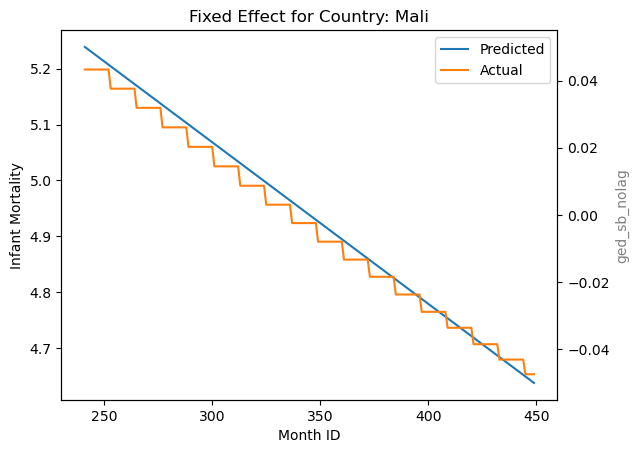

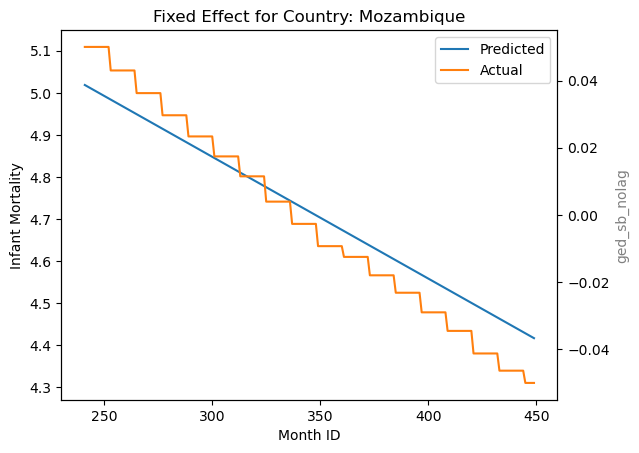

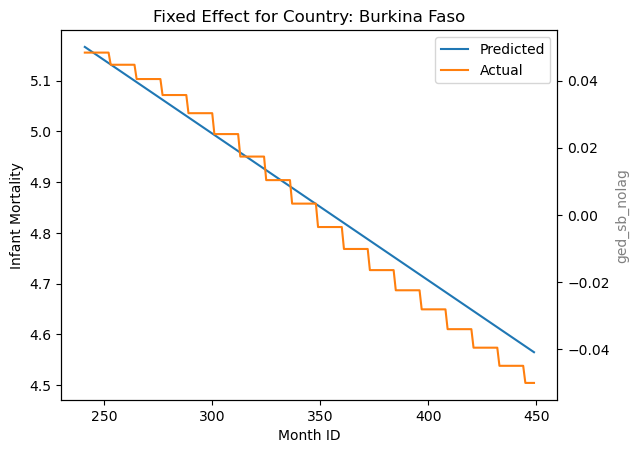

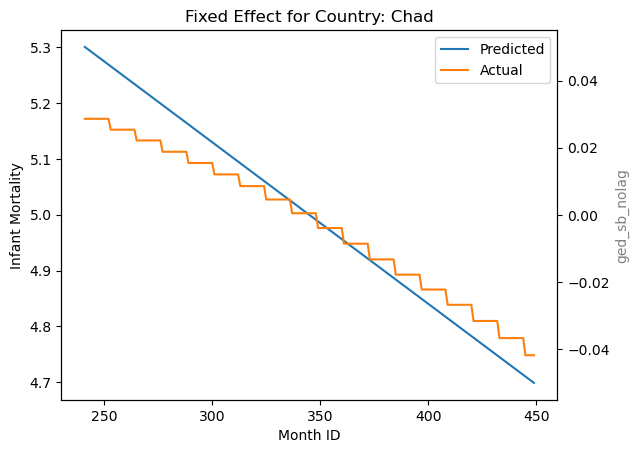

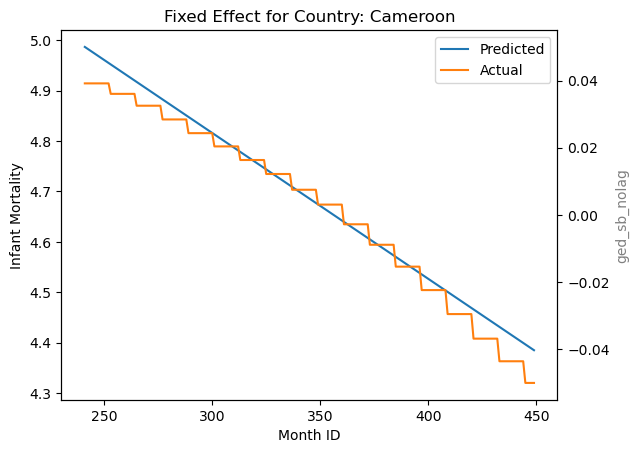

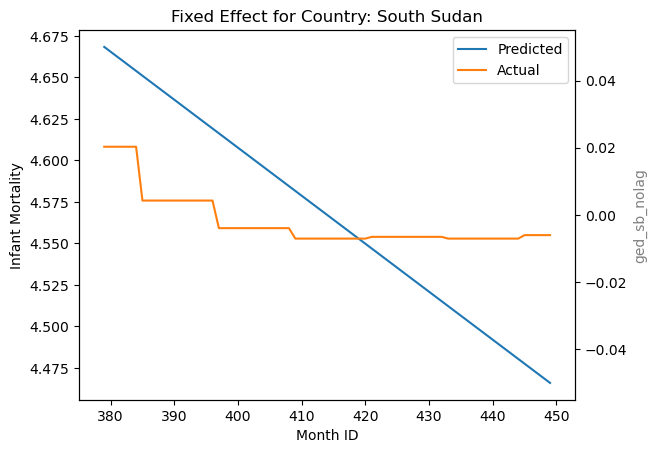

In [42]:
for country_id in [50, 162, 47, 214, 69, 246]:
    only_fixed_and_time.plot_time_series_regression(
        independent_variable_with_only_fixed, dependent_variable, 'Fixed Effect', country_id, 'ged_sb_nolag')

___

Combined Plots

___

In [43]:
def plot_multiple_predictions(predictions1, predictions2, predictions3, country_id):
    # Extract the predictions for the specified country_id
    country_predictions1 = predictions1.loc[(slice(None), country_id), :]
    country_predictions2 = predictions2.loc[(slice(None), country_id), :]
    country_predictions3 = predictions3.loc[(slice(None), country_id), :]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(country_predictions1.index.get_level_values('month_id'),
             country_predictions1['value'], label='Prediction 1')
    plt.plot(country_predictions2.index.get_level_values('month_id'),
             country_predictions2['value'], label='Prediction 2')
    plt.plot(country_predictions3.index.get_level_values('month_id'),
             country_predictions3['value'], label='Prediction 3')

    plt.xlabel('Month ID')
    plt.ylabel('Predicted Values')
    plt.title(f'Predictions for Country ID: {country_id}')
    plt.legend()
    plt.show()

In [44]:
x = data_with_shocks.predictions['Fixed Effect']
y = data_without_shocks.predictions['Fixed Effect']
z = contrafactuals.predictions['Fixed Effect']

In [45]:
x

month_id  country_id
241       1             3.827513
          2             3.443766
          3             3.485694
          4             3.062193
          5             3.240788
                          ...   
449       242           3.988766
          243           3.129489
          244           3.793392
          245           4.092515
          246           4.635589
Length: 39173, dtype: float64

In [46]:
x.loc[slice(None), 2,:]

month_id
241    3.443766
242    3.441858
243    3.439949
244    3.438041
245    3.436132
         ...   
445    2.884710
446    2.882802
447    2.880893
448    2.878984
449    2.877076
Length: 209, dtype: float64

In [47]:
df['country_name'].loc[slice(None), k,:]

month_id
241    St. Kitts and Nevis
242    St. Kitts and Nevis
243    St. Kitts and Nevis
244    St. Kitts and Nevis
245    St. Kitts and Nevis
              ...         
445    St. Kitts and Nevis
446    St. Kitts and Nevis
447    St. Kitts and Nevis
448    St. Kitts and Nevis
449    St. Kitts and Nevis
Name: country_name, Length: 209, dtype: object

In [48]:
df = Queryset("month_to_annual_moving_sum", "country_month").fetch()
df = df.query('month_id > 240 & month_id < 450')
df = df.query('country_id != [239,240]')
# Remove countries that don't exist anymore
df = df.query('country_id!=185')  # German Democratic Republic
# Remove country months that have value zero for dependent variable
df = df.query('wdi_sh_dyn_mort_fe!=0')
fixed_effect_column = 'country_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)
fixed_effect_column = 'month_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)

 .    

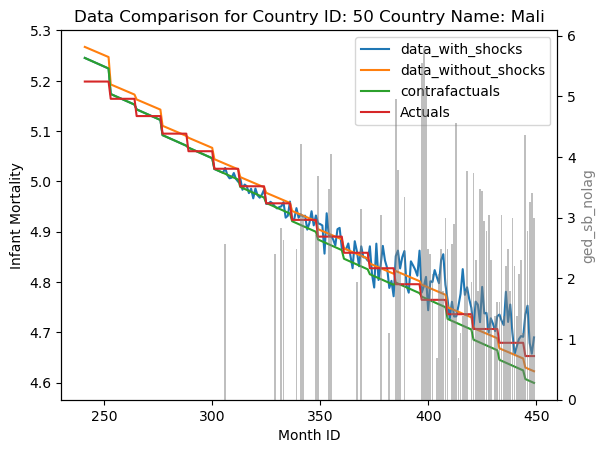

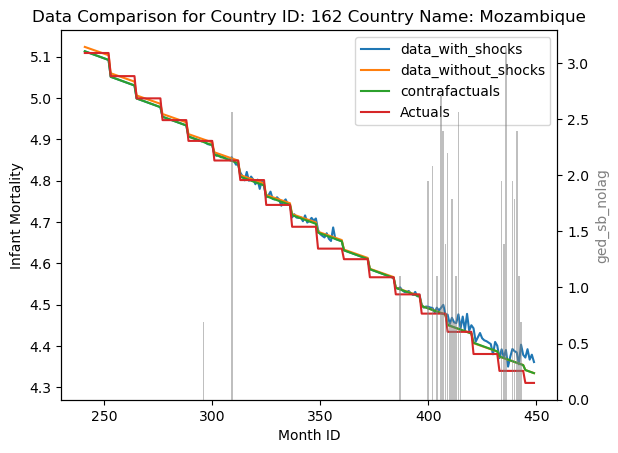

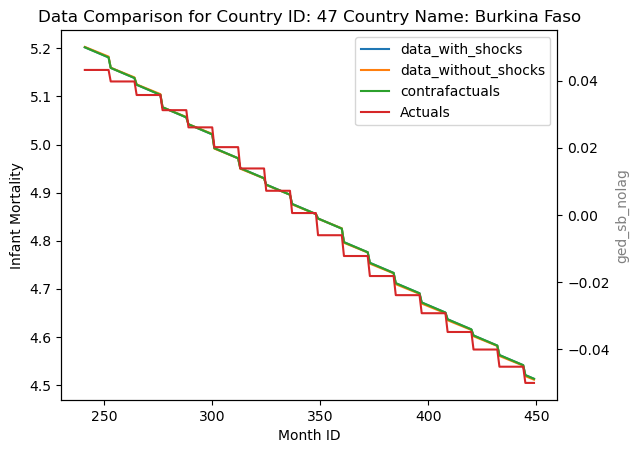

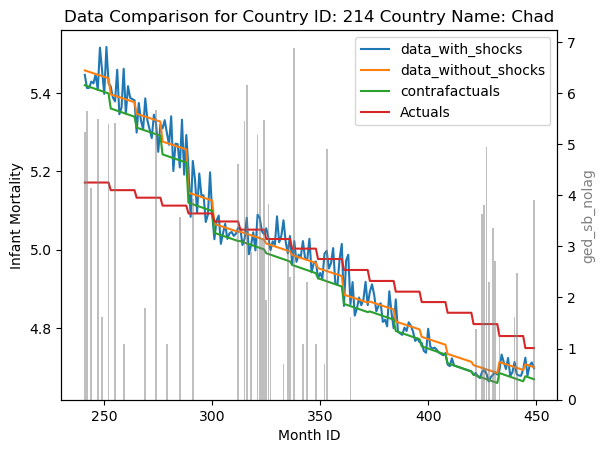

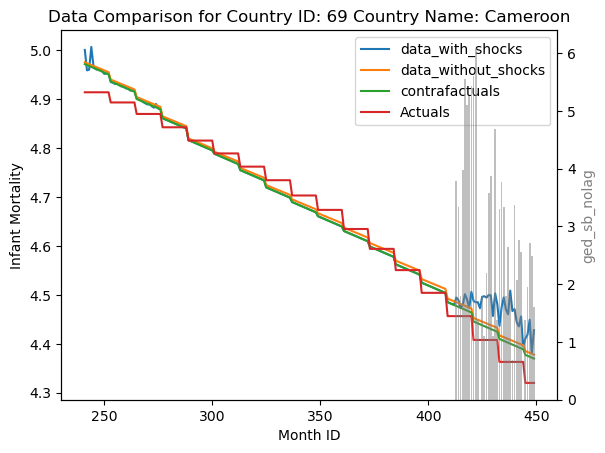

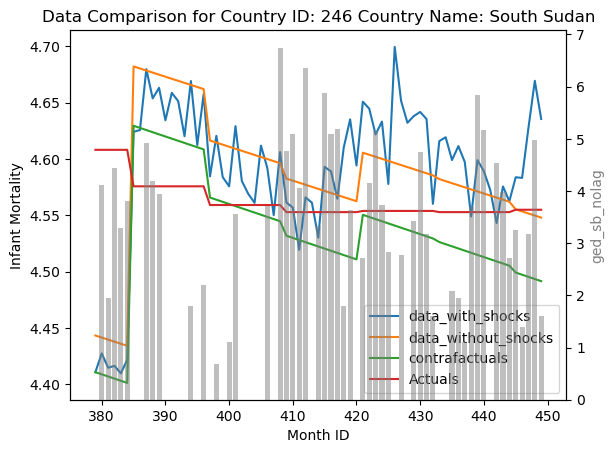

In [49]:

for k in [50, 162, 47, 214, 69, 246]:

    plt.plot(df['month_id'].loc[slice(None), k,:],x.loc[slice(None),k,:],label='data_with_shocks')
    plt.plot(df['month_id'].loc[slice(None), k, :],y.loc[slice(None),k,:],label='data_without_shocks')
    plt.plot(df['month_id'].loc[slice(None), k, :],z.loc[slice(None),k,:],label = 'contrafactuals')
    plt.plot(df['month_id'].loc[slice(None), k, :],
            df['wdi_sh_dyn_mort_fe'].loc[slice(None), k, :], label='Actuals')


    plt.legend()
    plt.xlabel('Month ID')
    plt.ylabel('Infant Mortality')
    plt.title(
        f"Data Comparison for Country ID: {k} Country Name: {df['country_name'].loc[slice(None), k, :].iloc[0]}")
    
    ax2 = plt.gca().twinx()
    ax2.bar(df['month_id'].loc[slice(None), k, :],df['ged_sb_nolag'].loc[slice(None),k,:],color='gray', alpha=0.5,label = 'contrafactuals')
    ax2.set_ylabel('ged_sb_nolag',color='gray')

    plt.show()

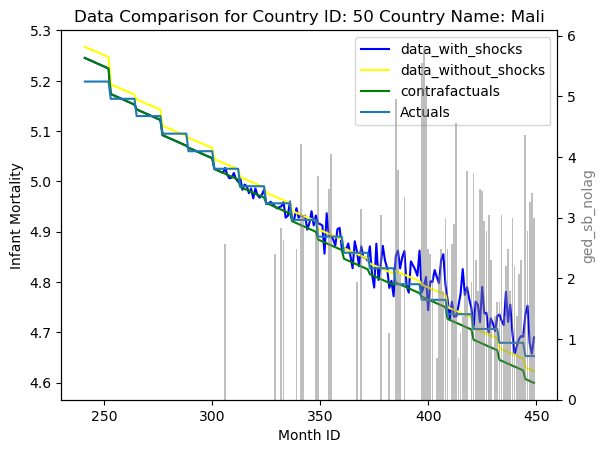

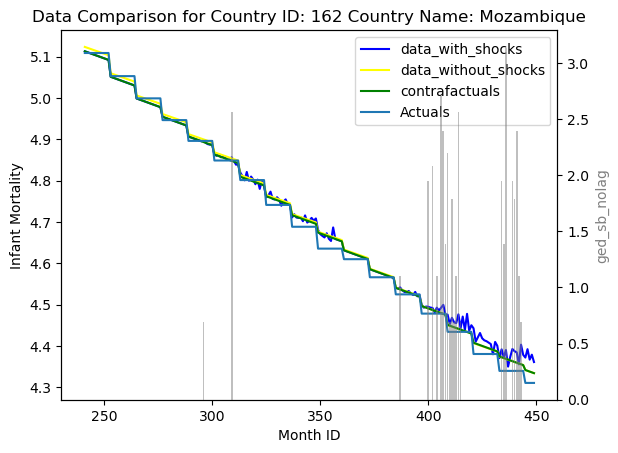

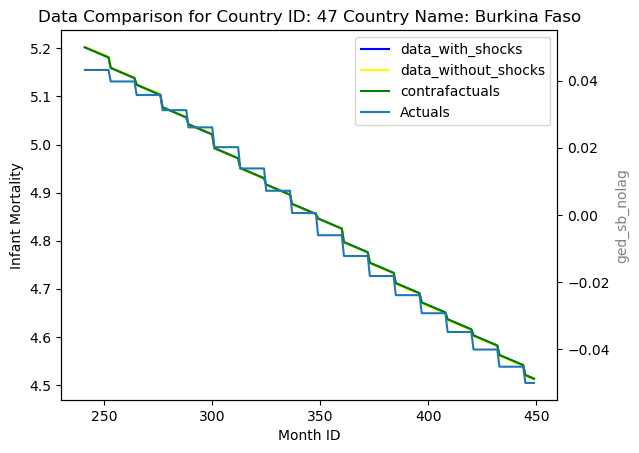

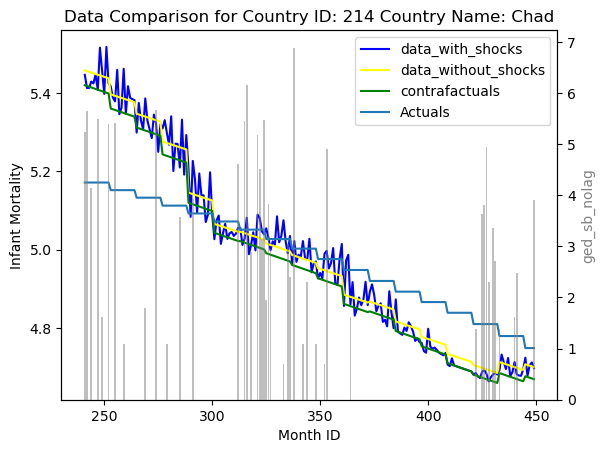

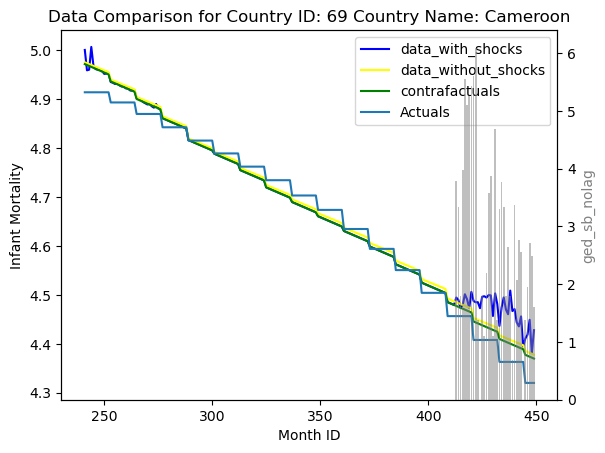

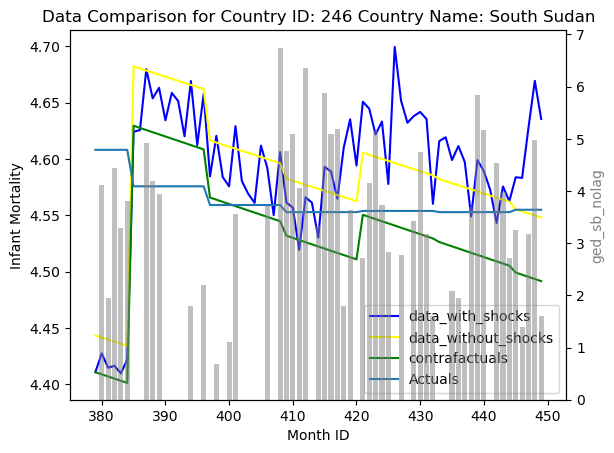

In [50]:
for k in [50, 162, 47, 214, 69, 246]:
    MonthToAnnualRegression.plotting_multiple_predictions(x, y, z, k,data_with_shocks.data)